# Boston Housing Data
---
## Load the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="white", font_scale=0.9)

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston['MEDV'] = dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
# A really small dataset to fit a neural network to
print(boston.shape)

(506, 14)


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis
---

In [8]:
boston['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

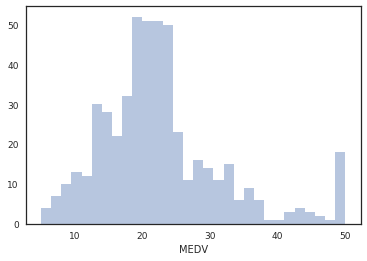

In [9]:
sns.distplot(boston['MEDV'], bins=30, kde=False)
plt.show()

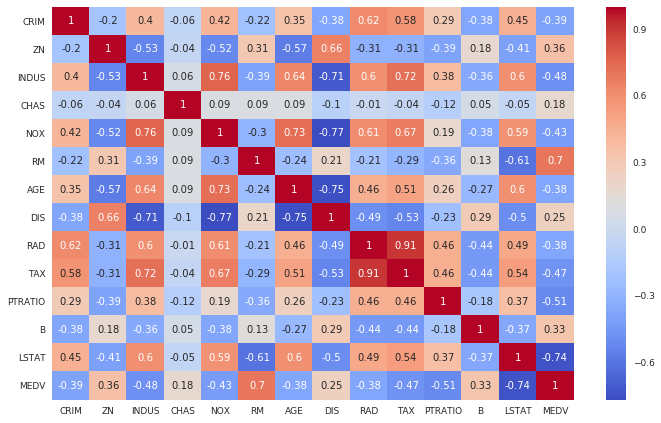

In [10]:
fig, ax = plt.subplots(figsize=(10,6))  
sns.heatmap(data=boston.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":10}, ax=ax)
plt.tight_layout()
plt.show()

### Per capita crime rate by town vs Median Value
---
Median value decreases as crime rate increases

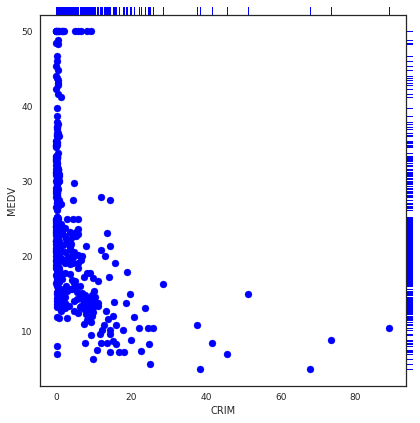

In [11]:
grid = sns.JointGrid(x='CRIM', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Proportion of non-retail business acres per town vs Median Value
---

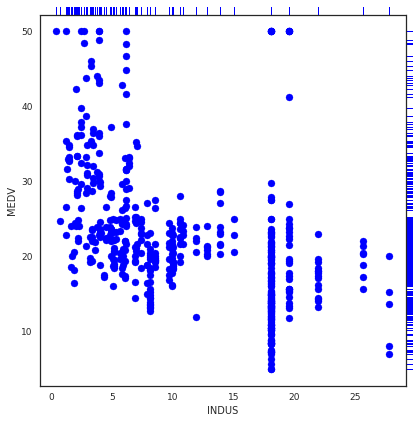

In [12]:
grid = sns.JointGrid(x='INDUS', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Proximity to Charles River vs Median Value
---

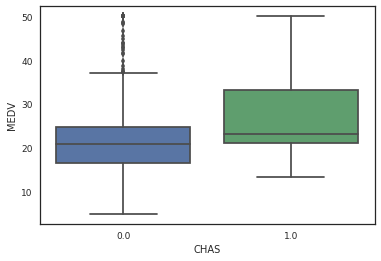

In [13]:
sns.boxplot(x='CHAS', y='MEDV', data=boston)
plt.show()

### NOX concentration vs Median Value
---

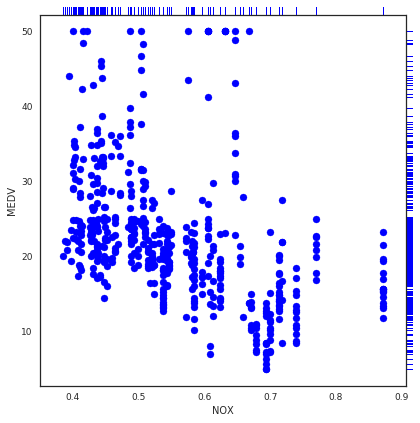

In [14]:
grid = sns.JointGrid(x='NOX', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Average Number of Rooms per Dwelling
---
Positive relationship here

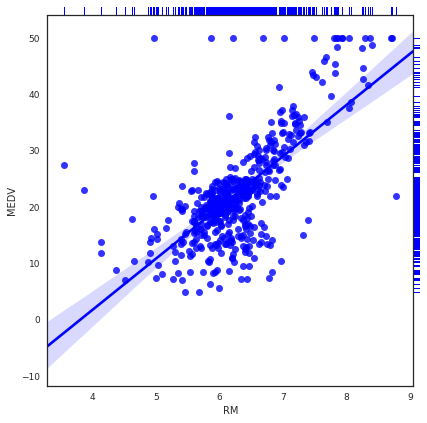

In [15]:
grid = sns.JointGrid(x='RM', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Proportion of owner-occupied units built prior to 1940 vs Median Value
---

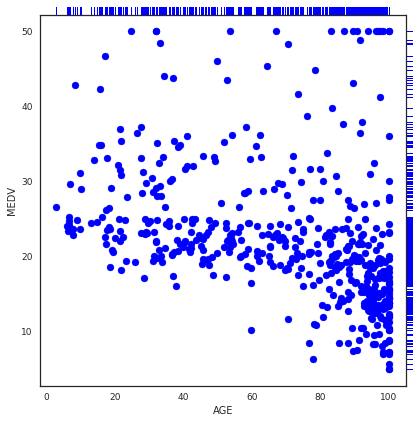

In [16]:
grid = sns.JointGrid(x='AGE', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Weighted distances to five Boston employment centres vs Median Values
---

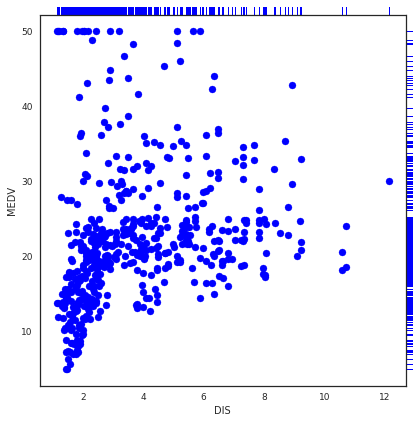

In [17]:
grid = sns.JointGrid(x='DIS', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Index of accessibility to radial highways vs Median Value
---

In [18]:
boston['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

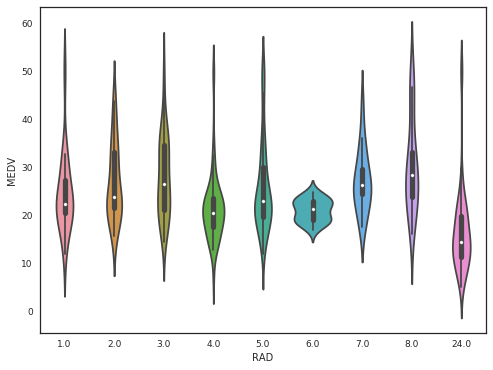

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='RAD', y='MEDV', data=boston, ax=ax)
plt.show()

### Full-value property-tax rate per $10,000 vs Median Value
---

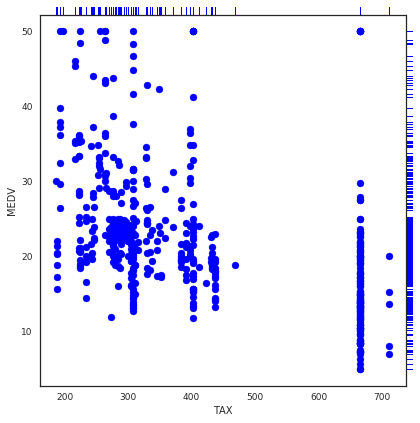

In [20]:
grid = sns.JointGrid(x='TAX', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### Pupil-teacher ratio by town vs Median Value
---

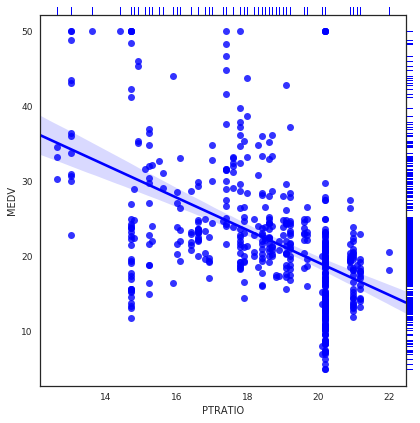

In [21]:
grid = sns.JointGrid(x='PTRATIO', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

### % lower status of the population vs Median Value
---

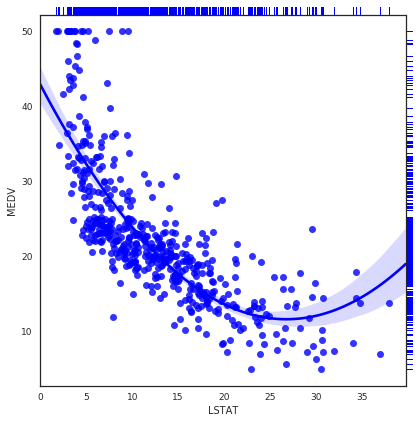

In [22]:
grid = sns.JointGrid(x='LSTAT', y='MEDV', data=boston, space=0, size=6, ratio=50)
grid.plot_joint(sns.regplot, color="b", order=2)
grid.plot_marginals(sns.rugplot, color="b", height=4)
plt.show()

# Run a Linear Regression
---

In [23]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


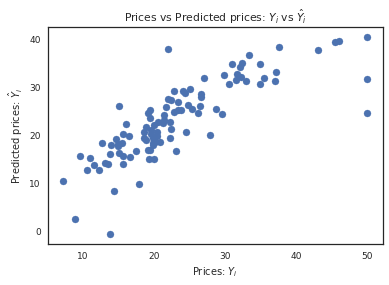

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Build a Neural Network using Keras
---

In [26]:
from keras.datasets import boston_housing
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [27]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [28]:
X_train.shape

(404, 13)

In [29]:
X_test.shape

(102, 13)

In [30]:
y_train[:5]

array([ 15.2,  42.3,  50. ,  21.1,  17.7])

## Normalize the data
---
Subtract the mean and divide by the standard deviation

In [31]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

## Use a small network to train the model
---
### Two Hidden Layers and 1 Output Layer with 64 neurons in each hidden layer

In [32]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

## K-Fold Cross Validation
---

In [33]:
import numpy as np
k = 4
num_val_samples = len(X_train) // k
num_epochs = 300
bs = 1
all_mae_scores = []

In [34]:
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
    
    # Validation data from k onwards. Training data from before k
    partial_Xtrain = np.concatenate(
        [X_train[:i * num_val_samples],
        X_train[(i+1) * num_val_samples:]], 
        axis=0)
    
    partial_ytrain = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i+1) * num_val_samples:]], 
        axis=0)
    
    model = build_model()
    history = model.fit(partial_Xtrain, partial_ytrain,
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size = bs, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
average_mae_scores = [np.mean([x[i] for x in all_mae_scores]) for i in range(num_epochs)]

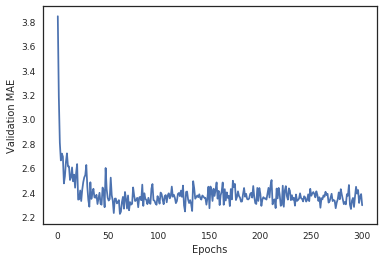

In [36]:
plt.plot(range(1, len(average_mae_scores) + 1), average_mae_scores)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [38]:
smooth_mae_history = smooth_curve(average_mae_scores[10:])

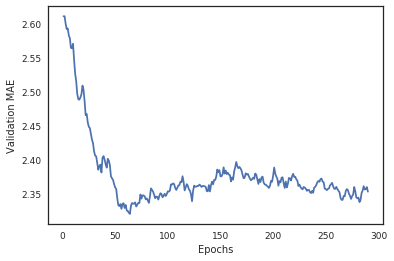

In [39]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Train the final model
---

In [50]:
model = build_model()
model.fit(X_train, y_train, epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

 32/102 [========>.....................] - ETA: 0s

In [51]:
test_mae_score

2.7506158866134345

## We are $2800 off final house price in Boston